In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Initial Conditions

Here a flow with M1 = 2.81 is deflected by a wedge (wedge angle = 10 deg.)

The shock angle should form at 30 deg. for gamma = 5/3


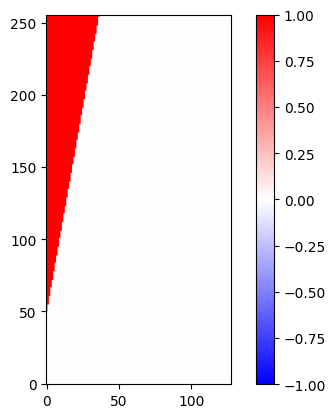

In [225]:
tag = ''
data = np.loadtxt("./output" + tag + "/bound-0.txt")
plt.imshow(data,origin='lower',cmap='bwr',vmin=-1,vmax=1)
plt.colorbar()
bound = data

ny, nx = np.shape(bound)

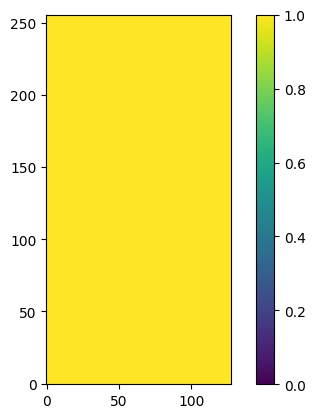

In [226]:
data = np.loadtxt("./output" + tag + "/rho-0.txt")
plt.imshow(data,vmin=0,origin='lower')
plt.colorbar()

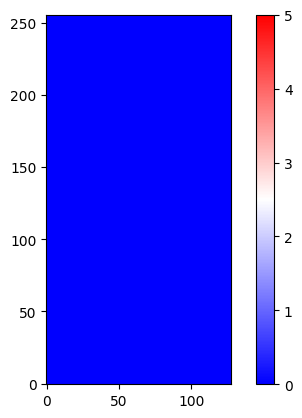

In [227]:
data = np.loadtxt("./output" + tag + "/u-0.txt")
plt.imshow(data,vmin=0,vmax=5,origin='lower',cmap='bwr')
plt.colorbar()

v =  3.628057
M1 =  3.459216621150596


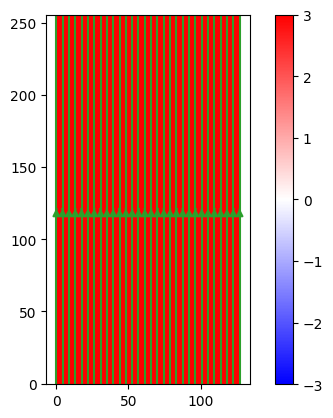

In [228]:
data = np.loadtxt("./output" + tag + "/v-0.txt")
plt.imshow(data,vmin=-3,vmax=3,origin='lower',cmap='bwr')
plt.colorbar()

v = np.loadtxt("./output/v-0.txt")
u = np.loadtxt("./output/u-0.txt")
m,n = u.shape
x, y = np.arange(0,n,1), np.arange(0,m,1)
plt.streamplot(x,y,u,v, density=1.0, color='tab:green')

print('v = ', np.max(v))
gamma = 1.1
print('M1 = ', np.max(v)/np.sqrt(gamma))

# Final Output

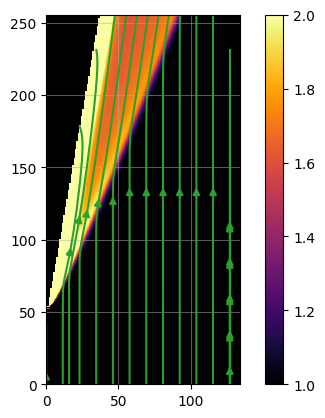

In [237]:
fig, axs = plt.subplots(1,1)

field = 'rho'
t = ''
data = np.loadtxt('./output' + tag + '/' + field + t + '.txt')
rho = data.copy()
rho[np.where(bound>0)] = float('nan')
plt.imshow(rho,origin='lower',cmap='inferno',vmin=1,vmax=2)
plt.colorbar()


v = np.loadtxt('./output' + tag + '/v' + t +'.txt')
u = np.loadtxt('./output' + tag + '/u' + t +'.txt')
v[np.where(bound>0)] = float('nan')
u[np.where(bound>0)] = float('nan')
m,n = u.shape
x, y = np.arange(0,n,1), np.arange(0,m,1)
plt.streamplot(x,y,u,v, density=0.4, color='tab:green',broken_streamlines=False)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.grid(alpha=0.5)
axs.set_facecolor("black")

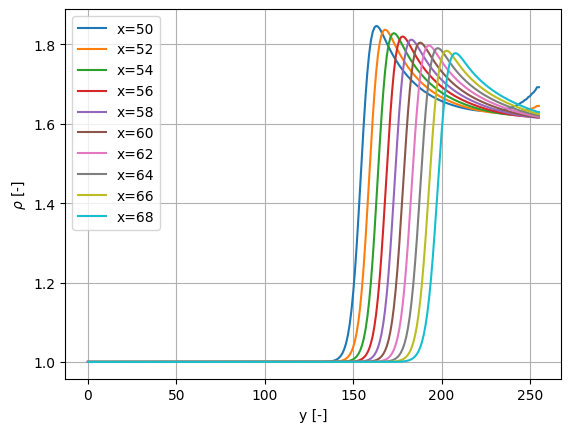

In [240]:
ny, nx = data.shape

xs, ys = [], []

for ii in range(50,70,(nx-20)//40):
    
    rho_out = data[:,ii]
    plt.plot(rho_out,label='x='+str(ii))
    
    xs.append(ii)
    ys.append(np.argmax(rho_out))
    
    

plt.grid()
plt.legend()
plt.xlabel('y [-]')
plt.ylabel('$\\rho$ [-]')

xs = np.asarray(xs)
ys = np.asarray(ys)

shock angle = 23.53 deg


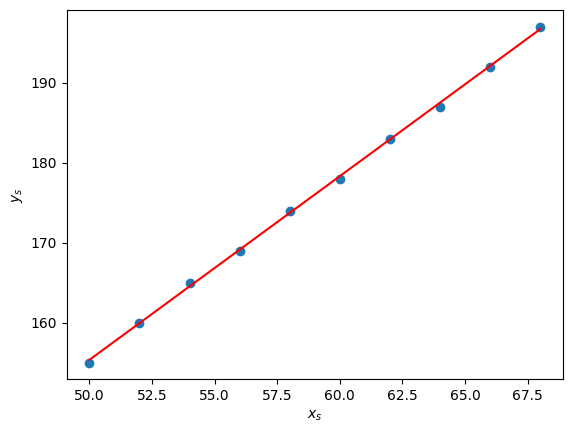

In [233]:
plt.plot(xs,ys,'o')
plt.xlabel('$x_s$')
plt.ylabel('$y_s$')

from scipy.optimize import curve_fit

def fn(x,m,c):
    return m*x + c

popt, pcov = curve_fit(fn, xs, ys)
plt.plot(xs, fn(xs, *popt), 'r-')

angle = np.arctan(popt[0])
print('shock angle = %1.2f deg'%(90-np.rad2deg(angle)))

# show pressure jump

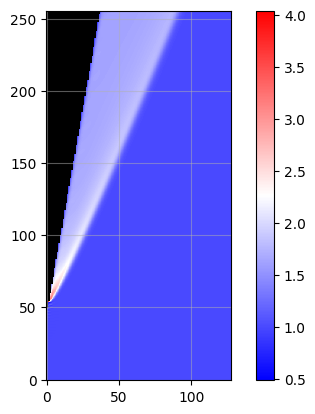

In [238]:
fig, axs = plt.subplots(1,1)
field = 'p'
p = np.loadtxt('./output' + tag + '/' + field + t + '.txt')
p[np.where(bound>0)] = float('nan')
plt.imshow(p,origin='lower',cmap='bwr')
plt.colorbar()
plt.grid(alpha=0.5)
axs.set_facecolor("black")

Text(0, 0.5, '$p$ [-]')

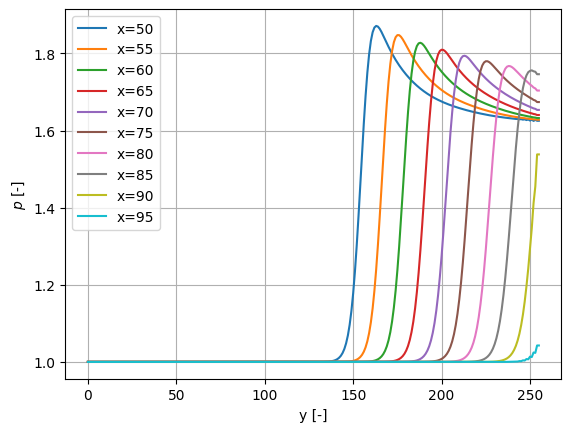

In [239]:
ny, nx = data.shape

for ii in range(50,100,(nx-20)//20):

    plt.plot(p[:,ii],label='x='+str(ii))

plt.grid()
plt.legend()
plt.xlabel('y [-]')
plt.ylabel('$p$ [-]')

# Save to GIF

In [241]:
import imageio
import os


# Setup
field = 'p'
tag = ''  # Add tag if needed
clrmap = 'inferno'
t_values = np.arange(0,2200,200)  # Modify with your actual t values
output_dir = './output' + tag + '/'
gif_frames_dir = './frames'
os.makedirs(gif_frames_dir, exist_ok=True)

# Loop over t values and create plots
filenames = []

for t in t_values:
    t = '-' + str(t)
    data = np.loadtxt(f'{output_dir}{field}{t}.txt')
    rho = data.copy()
    rho[np.where(bound > 0)] = float('nan')
    
    u = np.loadtxt(f'{output_dir}u{t}.txt')
    v = np.loadtxt(f'{output_dir}v{t}.txt')
    u[np.where(bound > 0)] = float('nan')
    v[np.where(bound > 0)] = float('nan')
    
    m, n = u.shape
    x, y = np.arange(0, n, 1), np.arange(0, m, 1)
    
    plt.figure(figsize=(6, 5))
    plt.imshow(rho, origin='lower', cmap=clrmap, vmin=1, vmax=2.0)
    plt.colorbar()
    plt.streamplot(x, y, u, v, density=0.4, color='tab:green', broken_streamlines=False)
    plt.ylim([0,ny])
    plt.xlim([0,nx])
    plt.xlabel('x [a.u.]')
    plt.ylabel('y [a.u.]')
    plt.grid(alpha=0.5)
    plt.title(field + ', ' + f'time = {t[1:]}')
    
    filename = f'{gif_frames_dir}/frame_{t}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()

# Create GIF
gif_path = field + '_animation.gif'
with imageio.get_writer(gif_path, mode='I', duration=0.25) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

print(f'GIF saved to {gif_path}')


/var/folders/yx/1xzcdppn0xxd5w6bf_xnbgrw0000gn/T/ipykernel_53785/1836728644.py:51: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


GIF saved to p_animation.gif


# Analytical Result

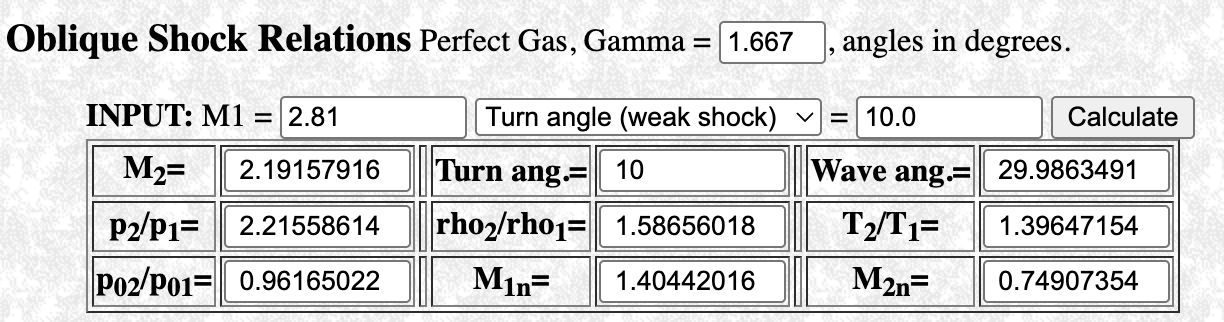

In [43]:
A = -6.0
alpha = 2
beta = 0.5
pressure = 2.2
density = 1.6
T = pressure * 1.0 / density
q = A * density * (density**alpha) * (T**beta)
tau = pressure / (1.667 -1) / q
tauH = 1.0 / 2.81 * np.sqrt(1.667 * 1.0 / 1.0)
print('cooling time = ', abs(tau))
print('hydro time = ', abs(tauH))
print('R = ', abs(tauH/tau))

cooling time =  0.11445487607327752
hydro time =  0.45947457000937814
R =  4.01446042119873


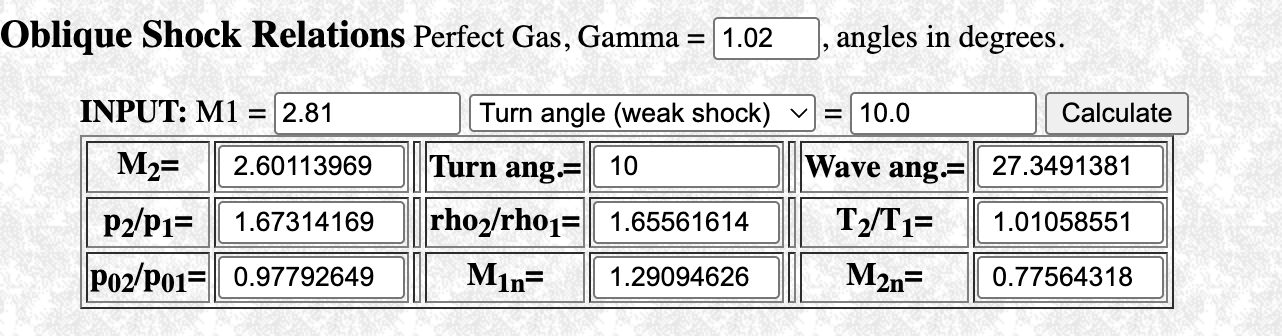

In [88]:
u = 2.81 * np.sqrt(1.667 * 1.0/1.0)
print(u)
print(u/np.sqrt(1.02 * 1.0/1.0))

3.6280571522510505
3.5923118750803273


In [108]:
3.628057/np.sqrt(1.667)

2.809999882078635